<a href="https://colab.research.google.com/github/SravaniPrakki/TravelRecommendation_ML/blob/main/GCN_Trip_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Datasets**
Yelp review dataset

In [ ]:
import pandas as pd
path="/content/drive/MyDrive/GCN_TripRecommendation/datasets/yelp_training_set_review.csv"

df=pd.read_csv(path)

In [ ]:
print(df.business_id,df.stars,df.user_id)
df.head(5)



0         9yKzy9PApeiPPOUJEtnvkg
1         ZRJwVLyzEJq1VAihDhYiow
2         6oRAC4uyJCsJl1X0WZpVSA
3         _1QQZuf4zZOyFCvXc0o6Vg
4         6ozycU1RpktNG2-1BroVtw
                   ...          
229902    vnffHkFJbmd-J3OaBbK2Eg
229903    l5oUrgQ190l8CcN8uzd_pA
229904    -EctXOb3B7T177jGYUhjVA
229905    YQvg0JCGRFUkb6reMMf3Iw
229906    gKxOZvQTTd5hpFa3r5igGQ
Name: business_id, Length: 229907, dtype: object 0         5
1         5
2         4
3         5
4         5
         ..
229902    2
229903    1
229904    4
229905    3
229906    5
Name: stars, Length: 229907, dtype: int64 0         rLtl8ZkDX5vH5nAx9C3q5Q
1         0a2KyEL0d3Yb1V6aivbIuQ
2         0hT2KtfLiobPvh6cDC8JQg
3         uZetl9T0NcROGOyFfughhg
4         vYmM4KTsC8ZfQBg-j5MWkw
                   ...          
229902    6e7pZofhDuIlD_rX2oYirQ
229903    dDNfSFT0VApxPmURclX6_g
229904    M5wHt6Odh1k5v0tIjqd8DQ
229905    jopndPrv-H5KW2CfScnw9A
229906    mbRUG6h0Mgb2XIJvscIoMg
Name: user_id, Length: 229907, dtype: object


,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg
3,3,False,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,...,18,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg
4,4,False,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,...,3,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw


In [ ]:
max(df["business_id"].value_counts())
# it means the table is heterogenous ?

844

In [ ]:
x = df.to_numpy()
x.shape # [num_movie_nodes x movie_node_feature_dim]

(229907, 32)

Kaggle dataset - indonesia reviews

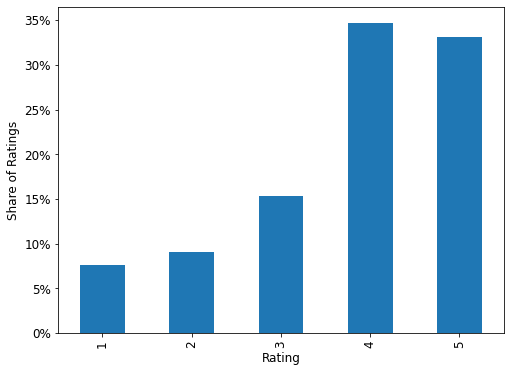

In [ ]:
from matplotlib import pyplot as plt    

fig = plt.figure()
ax = df.stars.value_counts(True).sort_index().plot.bar(figsize=(8,6))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Share of Ratings', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.savefig('Ratings_distribution.png')

what kind of table it has to be heterogenous need to extract the user, edges, node features to represent it in a graph format.

In [ ]:
path="/content/drive/MyDrive/GCN_TripRecommendation/datasets/Indonesia_Traveldatasets/package_tourism.csv"

In [ ]:
ff=pd.read_csv(path)

In [ ]:
#ff.describe

#fifa_ff = ff.sort_values(by="useful", ascending=False)
# print("Players: ", df_user.shape[0])
# df_user

In [ ]:
df_ratings = pd.read_csv('/content/drive/MyDrive/GCN_TripRecommendation/datasets/Indonesia_Traveldatasets/tourism_rating.csv')
df_movies = pd.read_csv('/content/drive/MyDrive/GCN_TripRecommendation/datasets/Indonesia_Traveldatasets/tourism_with_id.csv')

merged1 = pd.merge(df_ratings, df_movies, on='Place_Id', how='left')
df_user=pd.read_csv('/content/drive/MyDrive/GCN_TripRecommendation/datasets/Indonesia_Traveldatasets/user.csv')
merged2=pd.merge(merged1, df_user, on='User_Id', how='left')

In [ ]:
merged2.describe

<bound method NDFrame.describe of       User_Id  Place_Id  Place_Ratings                         Place_Name  \
0           1       179              3                    Candi Ratu Boko   
1           1       344              2                      Pantai Marina   
2           1         5              5           Atlantis Water Adventure   
3           1       373              3             Museum Kereta Ambarawa   
4           1       101              4      Kampung Wisata Sosro Menduran   
...       ...       ...            ...                                ...   
9995      300       425              2        Waterpark Kenjeran Surabaya   
9996      300        64              4     Museum Sasmita Loka Ahmad Yani   
9997      300       311              3                 The Lodge Maribaya   
9998      300       279              4  Masjid Agung Trans Studio Bandung   
9999      300       163              2                Watu Mabur Mangunan   

                                         

In [ ]:
fifa_df = merged2.sort_values(by="Rating", ascending=False)
print("Players: ", fifa_df.shape[0])
fifa_df.Place_Ratings

Players:  10000


6139    2
6168    2
9457    4
9420    5
9736    2
       ..
2379    1
6872    3
2326    4
8421    4
2466    3
Name: Place_Ratings, Length: 10000, dtype: int64

In [ ]:
print("Players: ", fifa_df.shape[0])
fifa_df.head()

Players:  10000


,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12,Location,Age
6139,184,29,2,Wisata Kuliner Pecenongan,Pecenongan merupakan salah satu surga kuliner ...,Pusat Perbelanjaan,Jakarta,0,5.0,NaN,"{'lat': -6.166788700000001, 'lng': 106.8265261}",-6.166789,106.826526,NaN,29,"Serang, Banten",30
6168,185,124,2,Kauman Pakualaman Yogyakarta,Pakualaman adalah sebuah kecamatan di Kota Yog...,Budaya,Yogyakarta,0,5.0,NaN,"{'lat': -7.801034700000001, 'lng': 110.3751922}",-7.801035,110.375192,NaN,124,"Cilacap, Jawa Tengah",33
9457,285,69,4,Freedom Library,Freedom Library adalah perpustakaan buku yang ...,Budaya,Jakarta,0,5.0,NaN,"{'lat': -6.202248200000001, 'lng': 106.8451968}",-6.202248,106.845197,NaN,69,"Jakarta Pusat, DKI Jakarta",29
9420,283,29,5,Wisata Kuliner Pecenongan,Pecenongan merupakan salah satu surga kuliner ...,Pusat Perbelanjaan,Jakarta,0,5.0,NaN,"{'lat': -6.166788700000001, 'lng': 106.8265261}",-6.166789,106.826526,NaN,29,"Bogor, Jawa Barat",37
9736,293,95,2,Desa Wisata Sungai Code Jogja Kota,"Kampung Code berada di Kelurahan Kotabaru, Kec...",Taman Hiburan,Yogyakarta,0,5.0,NaN,"{'lat': -7.822908900000001, 'lng': 110.3756894}",-7.822909,110.375689,NaN,95,"Subang, Jawa Barat",34


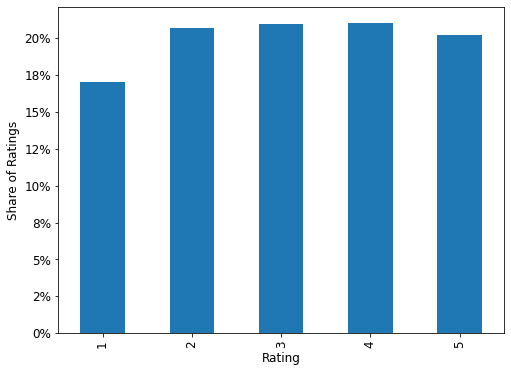

In [ ]:
from matplotlib import pyplot as plt    

fig = plt.figure()
ax = fifa_df.Place_Ratings.value_counts(True).sort_index().plot.bar(figsize=(8,6))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Share of Ratings', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.savefig('Ratings_distribution.png')

** need to check if the rating is 1 to 5 similar to the movies dataset in indonesia dataset as well as in the yelp reviews stars field dataset

# **2. To implement Graph structure importing necessary packages**

In [5]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

1.12.1+cu113


In [3]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html 
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

     |████████████████████████████████| 2.1 MB 4.1 MB/s 


In [4]:
!pip install -U -q PyDrive
!pip install -q git+https://github.com/snap-stanford/deepsnap.git

#**3. Mount the google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4. import required modules**

In [6]:
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
import torch
from torch import nn, optim, Tensor

In [8]:
import torch_geometric

In [9]:
from torch_sparse import SparseTensor, matmul

In [10]:
# packages for importing the GCN model

from torch_geometric.utils import structured_negative_sampling
from torch_geometric.data import download_url, extract_zip
from torch_geometric.nn.conv.gcn_conv import gcn_norm
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.typing import Adj

# **5. Load the dataset**

We have yelp reviews - that contains information about the users and businesses.It shows the relation of how the users rated the business/trips.

In [11]:
# download the Yelp dataset .csv file
# This will download the CSV file from the google drive.

import pandas as pd

review_path="/content/drive/MyDrive/GCN_TripRecommendation/datasets/yelp_training_set_review.csv"


In [12]:
# load user and review nodes
def load_node_csv(path, index_col):
    """Loads csv containing node information

    Args:
        path (str): path to csv file
        index_col (str): column name of index column

    Returns:
        dict: mapping of csv row to node id
    """
    df = pd.read_csv(path, index_col=index_col)
    mapping = {index: i for i, index in enumerate(df.index.unique())}
    return mapping

In [ ]:
reviews=pd.read_csv(review_path)

In [ ]:
reviews.head()

In [ ]:
reviews.user_id.is_unique

False

In [ ]:
reviews.business_id.is_unique

In [15]:
user_mapping = load_node_csv(review_path, index_col='user_id')
review_mapping = load_node_csv(review_path, index_col='business_id')

In [13]:
# Homogenous graph with no disticntion between users and business
# load edges between users and business
def load_edge_csv(path, src_index_col, src_mapping, dst_index_col,dst_mapping, link_index_col,rating_threshold):
    """Loads csv containing edges between users and items

    Args:
        path (str): path to csv file
        src_index_col (str): column name of users
        src_mapping (dict): mapping between row number and user id
        dst_index_col (str): column name of items
        dst_mapping (dict): mapping between row number and item id
        link_index_col (str): column name of user item interaction
        rating_threshold (int, optional): Threshold to determine positivity of edge. Defaults to 4.

    Returns:
        torch.Tensor: 2 by N matrix containing the node ids of N user-item edges
    """
    df = pd.read_csv(path)
    edge_index = None
    src = [src_mapping[index] for index in df[src_index_col]]
    dst = [dst_mapping[index] for index in df[dst_index_col]]
    edge_attr = torch.from_numpy(df[link_index_col].values).view(-1, 1).to(torch.long) >= rating_threshold
  # Assigns edge between the user and the item if the user has rated the place/business with rating >=4
    edge_index = [[],[]]
    for i in range(edge_attr.shape[0]):
        if edge_attr[i]:
            edge_index[0].append(src[i])
            edge_index[1].append(dst[i])
            

    return torch.tensor(edge_index)




In [16]:
edge_index = load_edge_csv(
    review_path,
    src_index_col='user_id',
    src_mapping=user_mapping,
    dst_index_col='business_id',
    dst_mapping=review_mapping,
    link_index_col='stars',
    rating_threshold=4,
    # To preprocess the data to include ratings >=4 as we would like to recommend these businsess/places to users
)

In [ ]:
# from torch_geometric.data import HeteroData
# data = HeteroData()

# data['user'].num_nodes =len( user_mapping ) # Users do not have any features.
# data['review'].num_nodes = len(review_mapping)

# print(data)


In [ ]:
# class IdentityEncoder(object):
#     def __init__(self, dtype=None):
#         self.dtype = dtype

#     def __call__(self, df):
#         return torch.from_numpy(df.values).view(-1, 1).to(self.dtype)

In [ ]:
# def load_edge_csv(path, src_index_col, src_mapping, dst_index_col, dst_mapping,
#                   encoders=None, **kwargs):
#     df = pd.read_csv(path, **kwargs)

#     src = [src_mapping[index] for index in df[src_index_col]]
#     dst = [dst_mapping[index] for index in df[dst_index_col]]
#     edge_index = torch.tensor([src, dst])

#     edge_attr = None
#     if encoders is not None:
#         edge_attrs = [encoder(df[col]) for col, encoder in encoders.items()]
#         edge_attr = torch.cat(edge_attrs, dim=-1)

#     return edge_index, edge_attr

In [ ]:
# edge_index, edge_label = load_edge_csv(
#     review_path,
#     src_index_col='user_id',
#     src_mapping=user_mapping,
#     dst_index_col='business_id',
#     dst_mapping=user_mapping,
#     encoders={'stars': IdentityEncoder(dtype=torch.long)},
# )

# data['user', 'stars', 'review'].edge_index = edge_index
# data['user', 'stars', 'review'].edge_label = edge_label

# print(data)


In [ ]:
review_mapping.values()

In [ ]:
edge_index

# **6. Display a sample homogenous bipartite Graph**

In [17]:
import networkx as nx
from networkx.algorithms import bipartite  # Conversion function

In [ ]:
# src = [user_mapping[index] for index in df['user_id']]
# dst = [review_mapping[index] for index in df['business_id']]
# edge_attr = torch.from_numpy(df['stars'].values).view(-1, 1).to(torch.long) >= 4
# edge_index = [[], []]
# for i in range(edge_attr.shape[0]):
#         if edge_attr[i]:
#             edge_index[0].append(src[i])
#             edge_index[1].append(dst[i])

In [ ]:
G = nx.Graph()

In [ ]:
# user_source=[]
# for i in range(3):
#  user_source.append(random.choice(list(user_mapping.values())))

In [ ]:
# review_target=[]
# for i in range(3):
#  review_target.append(random.choice(list(review_mapping.keys())))

In [ ]:
# G.add_nodes_from([user_source[0],user_source[1],user_source[2]],bipartite=0,label='user')
# G.add_nodes_from([review_target[0],review_target[1],review_target[2]],bipartite=1,label='item')

In [ ]:
# G.add_nodes_from([edge_index[0][1],edge_index[0][2],edge_index[0][3]],bipartite=0,label='user')
# G.add_nodes_from([edge_index[1][19],edge_index[1][11]],bipartite=1,label='item')

In [ ]:
# edge_index

In [ ]:
# for i,j in zip(range(3),range(3)):
#  G.add_edge(edge_index[0][1], edge_index[1][9], rating='stars')

In [ ]:
# print(G)

Graph with 5 nodes and 1 edges


In [ ]:
# bipartite.is_bipartite(G)

True

In [ ]:
# nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G, [user_source[0],user_source[1],user_source[2]]),width=2,with_labels='True')


In [ ]:
# user_source=[]
# for i in range(3):
#  user_source.append(random.choice(list(user_mapping.values())))


In [ ]:
# user_source

[19228, 8537, 21398]

In [18]:
user_source=["rLtl8ZkDX5vH5nAx9C3q5Q", "0a2KyEL0d3Yb1V6aivbIuQ","0hT2KtfLiobPvh6cDC8JQg","uZetl9T0NcROGOyFfughhg","vYmM4KTsC8ZfQBg-j5MWkw"]
review_target=["9yKzy9PApeiPPOUJEtnvkg", "ZRJwVLyzEJq1VAihDhYiow", "6oRAC4uyJCsJl1X0WZpVSA", "_1QQZuf4zZOyFCvXc0o6Vg","6ozycU1RpktNG2-1BroVtw"]

In [ ]:
# # Extract the ratings while extracting the edges from DF
# edges = [x for x in range(3)]

# B = nx.Graph()

# B.add_nodes_from(user_source, bipartite=0, label='user')
# B.add_nodes_from(review_target, bipartite=1, label='item')

# # Now assign the ratings correctly to edges
# for row in edges:
#     B.add_edge(user_source[row], review_target[row], rating='stars')

# #Now draw the edge labels using draw_netwokrx_edge_labels:

# left_or_top = df.index.unique()
# pos = nx.bipartite_layout(B, left_or_top)

# # Draw the graph
# nx.draw(B,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,
#      edge_cmap=plt.cm.Blues,with_labels=True)

# # Get the edge labels for ratings
# edge_labels = nx.get_edge_attributes(B,'stars')

# # Draw the edge labels
# nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)

In [19]:
# Initialise the graph
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
top_nodes = ["rLtl8ZkDX5vH5nAx9C3q5Q","0a2KyEL0d3Yb1V6aivbIuQ","0hT2KtfLiobPvh6cDC8JQg","uZetl9T0NcROGOyFfughhg","vYmM4KTsC8ZfQBg-j5MWkw"]
bottom_nodes = ["9yKzy9PApeiPPOUJEtnvkg", "ZRJwVLyzEJq1VAihDhYiow", "6oRAC4uyJCsJl1X0WZpVSA", "_1QQZuf4zZOyFCvXc0o6Vg","6ozycU1RpktNG2-1BroVtw","wzP2yNpV5p04nh0injjymA"]
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)
# Add edges with weights
B.add_edge("rLtl8ZkDX5vH5nAx9C3q5Q", "9yKzy9PApeiPPOUJEtnvkg", weight = 5)
B.add_edge("rLtl8ZkDX5vH5nAx9C3q5Q", "wzP2yNpV5p04nh0injjymA", weight = 4)
B.add_edge("0a2KyEL0d3Yb1V6aivbIuQ", "ZRJwVLyzEJq1VAihDhYiow", weight = 5)
B.add_edge("0hT2KtfLiobPvh6cDC8JQg", "6oRAC4uyJCsJl1X0WZpVSA", weight = 4)
B.add_edge("uZetl9T0NcROGOyFfughhg", "_1QQZuf4zZOyFCvXc0o6Vg", weight = 5)
B.add_edge("vYmM4KTsC8ZfQBg-j5MWkw", "6ozycU1RpktNG2-1BroVtw", weight = 5)


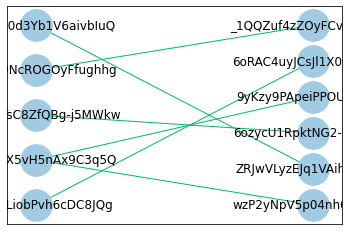

In [20]:
nx.draw_networkx(B, pos = nx.bipartite_layout(B, top_nodes), node_color='#A0CBE2',edge_color='#00bb5e',node_size=1000,width=1,
     edge_cmap=plt.cm.Blues,with_labels=True)


#**7. Train/validation/test split**

In [21]:
# Representing the adjacency matrix as sparsetensor as the matrix has most values as zero
# This representation reduces memory head

num_users, num_places = len(user_mapping), len(review_mapping)

#shape of the edge_index ie., link between user and places nodes is flattened
num_interactions = edge_index.shape[1]

In [ ]:
print(num_users)
print(num_places)
print(num_interactions)

45981
11537
156071


In [22]:
#all_indecides hold all the index values for the graph_index in an array format 
all_indices = [i for i in range(num_interactions)]

# uses sklearn.model_selection.train_test_split package to split the 3 sets train, validation and test,
# but the underlying input graph remains the same

# of all the indices it splits the 20% to test_indices and its (complement) 80% to train_indicies
train_indices, test_indices = train_test_split(all_indices, test_size=0.2, random_state=1)

# of the test_indicies, it splits 10% to test_indicies and its (complement) 10% to val_indices
val_indices, test_indices = train_test_split(test_indices, test_size=0.5, random_state=1)

In [23]:
# As we are doing link/edge prediction we are splitting this edge information to 3 sets train, validation and test
# proportion of edges are as follows 80% --> train; 10% --> test; 10% --> validation

# The [:, :] stands for everything from the beginning to the end just like for lists

# The below statement assigns the interaction edges which were generated for the homogenous graph to the appropriate proportion
# to that particular

# we take the edges (tuples between user and places ie., the link information) and split to test and train datasets

train_edge_index = edge_index[:, train_indices]
val_edge_index = edge_index[:, val_indices]
test_edge_index = edge_index[:, test_indices]

In [24]:
# convert edge indices into Sparse Tensors: https://pytorch-geometric.readthedocs.io/en/latest/notes/sparse_tensor.html
# Here the edge_index format (interaction graph) is converted to sparsetensor (mainly used for matrices with more zero values)
# used for GNN models, this format is given as input to the models beneath.

train_sparse_edge_index = SparseTensor(row=train_edge_index[0], col=train_edge_index[1], sparse_sizes=(
    num_users + num_places, num_users + num_places))
val_sparse_edge_index = SparseTensor(row=val_edge_index[0], col=val_edge_index[1], sparse_sizes=(
    num_users + num_places, num_users + num_places))
test_sparse_edge_index = SparseTensor(row=test_edge_index[0], col=test_edge_index[1], sparse_sizes=(
    num_users + num_places, num_users + num_places))

In [25]:
train_sparse_edge_index

SparseTensor(row=tensor([    0,     0,     0,  ..., 45975, 45976, 45978]),
             col=tensor([   0,    5,   26,  ..., 9906, 2247,  967]),
             size=(57518, 57518), nnz=124856, density=0.00%)

# **8. Implementing LightGCN**

## LightGCN has 2 steps 1) Neighbourhood aggregation 2) Interlayer combination

We calculate the initial embeddings $E^{(0)}$ and the bipartite graph, we iterate over each node to perform neighborhood aggregation.  LightGCN uses **a simple weighted sum aggregator** and **avoids the heavy-lifting feature transformation and nonlinear activation**.

Within each layer, for each user in the graph, we compute its updated embedding as the weighted sum of embeddings from all its neighboring items (movies) following the formula below:
$$ \textbf{e}_u^{(k+1)} = \sum_{i \in N_u} \frac{1}{\sqrt{|N_u|} \sqrt{|N_i|}} \textbf{e}_i^{(k)} $$
where $ \textbf{e}_u^{(k)} $ and $ \textbf{e}_i^{(k)} $ are the user and item (movie) node embeddings at the k-th layer. $ |N_u| $ and $ |N_i| $ are the user and item nodes’ number of neighbors.

Similarly, for each item, the updated embedding is computed using weighted sum of its neighboring users:
$$ \textbf{e}_i^{(k+1)} = \sum_{i \in N_i} \frac{1}{\sqrt{|N_i|} \sqrt{|N_u|}} \textbf{e}_u^{(k)} $$

In [28]:
# defines LightGCN model

# The below model uses torch_geometric.nn package for defining the LightGCN model
# The model is from https://pytorch-geometric.readthedocs.io/en/latest/notes/create_gnn.html

# packages used torch_geometric.nn.conv.gcn_conv for normalization, torch_geometric.nn.conv for MessagePassing

class LightGCN(MessagePassing):
    """LightGCN Model as proposed in https://arxiv.org/abs/2002.02126
    """
    
    # This _init_method lets the class initialize the objects (constructor)
    #Initializes the Light GCN model

    def __init__(self, num_users, num_places, embedding_dim=64, K=3, add_self_loops=False):
        """Initializes LightGCN Model

        Args:
            num_users (int): Number of users
            num_places (int): Number of places/business
            embedding_dim (int, optional): Dimensionality of embeddings. Defaults to 8.
            K (int, optional): Number of message passing layers. Defaults to 3.
            add_self_loops (bool, optional): Whether to add self loops for message passing. Defaults to False.
        """

        super().__init__()

        self.num_users, self.num_places = num_users, num_places
        # assigns the users and places/business similar to the existing original paper code

        self.embedding_dim, self.K = embedding_dim, K
        # the embedding dimesion values and no of message passing layers are defined in the init method.

        self.add_self_loops = add_self_loops
        # Here there are no self loops as it is a bipartite graph.
        
        # calculating the base 64 embedding vectors for the user and places(items) (upto 8)
        self.users_emb = nn.Embedding(
            num_embeddings=self.num_users, embedding_dim=self.embedding_dim) # e_u^0
        self.items_emb = nn.Embedding(
            num_embeddings=self.num_places, embedding_dim=self.embedding_dim) # e_i^0
        
        # setting standard deviation = 0.1 instead of 1 (overriing the normal distribution which is 1 by setting standard deviation parameters)
        nn.init.normal_(self.users_emb.weight, std=0.1)
        # gaussian distribution(general distribution) mean =0, variance =1 (normal distribution)
        # setting parametes for neural network
        nn.init.normal_(self.items_emb.weight, std=0.1)

# Message passing and aggregation functions are mentioned below

    def forward(self, edge_index: SparseTensor):
        """Forward propagation of LightGCN Model.

        Args:
            edge_index (SparseTensor): adjacency matrix

        Returns:
            tuple (Tensor): e_u_k, e_u_0, e_i_k, e_i_0
        """
        # compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(
            edge_index, add_self_loops=self.add_self_loops)

        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight]) # E^0
        embs = [emb_0]
        emb_k = emb_0

        # multi-scale diffusion
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1) # E^K

        users_emb_final, items_emb_final = torch.split(
            emb_final, [self.num_users, self.num_places]) # splits into e_u^K and e_i^K

        # returns e_u^K, e_u^0, e_i^K, e_i^0
        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight

    def message(self, x_j: Tensor) -> Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: Tensor) -> Tensor:
        # computes \tilde{A} @ x
        return matmul(adj_t, x)



In [ ]:
model = LightGCN(num_users, num_places)

In [ ]:
# Below code is for Loss function and negative sampling

# To train the LightGCN model, we need an objective function that aligns with our goal for movie recommendation.
# We use the Bayesian Personalized Ranking (BPR) loss,
# which encourages observed user-item predictions to have increasingly higher values than unobserved ones

def bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, lambda_val):
    """Bayesian Personalized Ranking Loss as described in https://arxiv.org/abs/1205.2618

    Args:
        users_emb_final (torch.Tensor): e_u_k
        users_emb_0 (torch.Tensor): e_u_0
        pos_items_emb_final (torch.Tensor): positive e_i_k
        pos_items_emb_0 (torch.Tensor): positive e_i_0
        neg_items_emb_final (torch.Tensor): negative e_i_k
        neg_items_emb_0 (torch.Tensor): negative e_i_0
        lambda_val (float): lambda value for regularization loss term

    Returns:
        torch.Tensor: scalar bpr loss value
    """
    reg_loss = lambda_val * (users_emb_0.norm(2).pow(2) +
                             pos_items_emb_0.norm(2).pow(2) +
                             neg_items_emb_0.norm(2).pow(2)) # L2 loss

    pos_scores = torch.mul(users_emb_final, pos_items_emb_final)
    pos_scores = torch.sum(pos_scores, dim=-1) # predicted scores of positive samples
    neg_scores = torch.mul(users_emb_final, neg_items_emb_final)
    neg_scores = torch.sum(neg_scores, dim=-1) # predicted scores of negative samples

    loss = -torch.mean(torch.nn.functional.softplus(pos_scores - neg_scores)) + reg_loss

    return loss

In [ ]:
# helper function to get N_u
def get_user_positive_items(edge_index):
    """Generates dictionary of positive items for each user

    Args:
        edge_index (torch.Tensor): 2 by N list of edges

    Returns:
        dict: dictionary of positive items for each user
    """
    user_pos_items = {}
    for i in range(edge_index.shape[1]):
        user = edge_index[0][i].item()
        item = edge_index[1][i].item()
        if user not in user_pos_items:
            user_pos_items[user] = []
        user_pos_items[user].append(item)
    return user_pos_items

In [ ]:
# computes recall@K and precision@K
def RecallPrecision_ATk(groundTruth, r, k):
    """Computers recall @ k and precision @ k

    Args:
        groundTruth (list): list of lists containing highly rated items of each user
        r (list): list of lists indicating whether each top k item recommended to each user
            is a top k ground truth item or not
        k (intg): determines the top k items to compute precision and recall on

    Returns:
        tuple: recall @ k, precision @ k
    """
    num_correct_pred = torch.sum(r, dim=-1)  # number of correctly predicted items per user
    # number of items liked by each user in the test set
    user_num_liked = torch.Tensor([len(groundTruth[i])
                                  for i in range(len(groundTruth))])
    recall = torch.mean(num_correct_pred / user_num_liked)
    precision = torch.mean(num_correct_pred) / k
    return recall.item(), precision.item()

In [ ]:
# computes NDCG@K
def NDCGatK_r(groundTruth, r, k):
    """Computes Normalized Discounted Cumulative Gain (NDCG) @ k

    Args:
        groundTruth (list): list of lists containing highly rated items of each user
        r (list): list of lists indicating whether each top k item recommended to each user
            is a top k ground truth item or not
        k (int): determines the top k items to compute ndcg on

    Returns:
        float: ndcg @ k
    """
    assert len(r) == len(groundTruth)

    test_matrix = torch.zeros((len(r), k))

    for i, items in enumerate(groundTruth):
        length = min(len(items), k)
        test_matrix[i, :length] = 1
    max_r = test_matrix
    idcg = torch.sum(max_r * 1. / torch.log2(torch.arange(2, k + 2)), axis=1)
    dcg = r * (1. / torch.log2(torch.arange(2, k + 2)))
    dcg = torch.sum(dcg, axis=1)
    idcg[idcg == 0.] = 1.
    ndcg = dcg / idcg
    ndcg[torch.isnan(ndcg)] = 0.
    return torch.mean(ndcg).item()

In [ ]:
# wrapper function to get evaluation metrics
def get_metrics(model, edge_index, exclude_edge_indices, k):
    """Computes the evaluation metrics: recall, precision, and ndcg @ k

    Args:
        model (LighGCN): lightgcn model
        edge_index (torch.Tensor): 2 by N list of edges for split to evaluate
        exclude_edge_indices ([type]): 2 by N list of edges for split to discount from evaluation
        k (int): determines the top k items to compute metrics on

    Returns:
        tuple: recall @ k, precision @ k, ndcg @ k
    """
    user_embedding = model.users_emb.weight
    item_embedding = model.items_emb.weight

    # get ratings between every user and item - shape is num users x num movies
    rating = torch.matmul(user_embedding, item_embedding.T)

    for exclude_edge_index in exclude_edge_indices:
        # gets all the positive items for each user from the edge index
        user_pos_items = get_user_positive_items(exclude_edge_index)
        # get coordinates of all edges to exclude
        exclude_users = []
        exclude_items = []
        for user, items in user_pos_items.items():
            exclude_users.extend([user] * len(items))
            exclude_items.extend(items)

        # set ratings of excluded edges to large negative value
        rating[exclude_users, exclude_items] = -(1 << 10)

    # get the top k recommended items for each user
    _, top_K_items = torch.topk(rating, k=k)

    # get all unique users in evaluated split
    users = edge_index[0].unique()

    test_user_pos_items = get_user_positive_items(edge_index)

    # convert test user pos items dictionary into a list
    test_user_pos_items_list = [
        test_user_pos_items[user.item()] for user in users]

    # determine the correctness of topk predictions
    r = []
    for user in users:
        ground_truth_items = test_user_pos_items[user.item()]
        label = list(map(lambda x: x in ground_truth_items, top_K_items[user]))
        r.append(label)
    r = torch.Tensor(np.array(r).astype('float'))

    recall, precision = RecallPrecision_ATk(test_user_pos_items_list, r, k)
    ndcg = NDCGatK_r(test_user_pos_items_list, r, k)

    return recall, precision, ndcg

In [ ]:
# wrapper function to evaluate model
def evaluation(model, edge_index, sparse_edge_index, exclude_edge_indices, k, lambda_val):
    """Evaluates model loss and metrics including recall, precision, ndcg @ k

    Args:
        model (LighGCN): lightgcn model
        edge_index (torch.Tensor): 2 by N list of edges for split to evaluate
        sparse_edge_index (sparseTensor): sparse adjacency matrix for split to evaluate
        exclude_edge_indices ([type]): 2 by N list of edges for split to discount from evaluation
        k (int): determines the top k items to compute metrics on
        lambda_val (float): determines lambda for bpr loss

    Returns:
        tuple: bpr loss, recall @ k, precision @ k, ndcg @ k
    """
    # get embeddings
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        sparse_edge_index)
    edges = structured_negative_sampling(
        edge_index, contains_neg_self_loops=False)
    user_indices, pos_item_indices, neg_item_indices = edges[0], edges[1], edges[2]
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0,
                    neg_items_emb_final, neg_items_emb_0, lambda_val).item()

    recall, precision, ndcg = get_metrics(
        model, edge_index, exclude_edge_indices, k)

    return loss, recall, precision, ndcg

# **9. Mini Batch for postive, negative samples**

In [ ]:
# function which random samples a mini-batch of positive and negative samples
def sample_mini_batch(batch_size, edge_index):
    """Randomly samples indices of a minibatch given an adjacency matrix

    Args:
        batch_size (int): minibatch size
        edge_index (torch.Tensor): 2 by N list of edges

    Returns:
        tuple: user indices, positive item indices, negative item indices
    """
    edges = structured_negative_sampling(edge_index)
    edges = torch.stack(edges, dim=0)
    indices = random.choices(
        [i for i in range(edges[0].shape[0])], k=batch_size)
    batch = edges[:, indices]
    user_indices, pos_item_indices, neg_item_indices = batch[0], batch[1], batch[2]
    return user_indices, pos_item_indices, neg_item_indices

7. Data Load**

Node mapping and feature extraction

In [ ]:
# Sort to define the order of nodes
sorted_df = users.sort_values(by="user_id").set_index("user_id")

# Map IDs to start from 0
sorted_df = sorted_df.reset_index(drop=False)
movie_id_mapping = sorted_df["user_id"]

# Select node features
node_features = sorted_df[["name","review_count" ,"yelping_since", "average_stars","friends"]]
# Convert non-numeric columns
pd.set_option('mode.chained_assignment', None)

# # For simplicity I'll just select the first genre here and ignore the others
# genres = node_features["genre"].str.split(",", expand=True)
# node_features["main_genre"] = genres[0]

# One-hot encoding
# anime_node_features = pd.concat([node_features, pd.get_dummies(node_features["main_genre"])], axis=1, join='inner')
# anime_node_features = pd.concat([anime_node_features, pd.get_dummies(anime_node_features["type"])], axis=1, join='inner')
# anime_node_features.drop(["genre", "main_genre"], axis=1, inplace=True)
node_features.head(10)

In [ ]:
# stuck at how to process the dataformat df to get the rating matrix....yet to be explored.

# check the graph extraction video deepfindr you have

# If that does not work try and see what fields are there in the yelp reviews pytorch geometric dataset which is already done for you...worst case consider this.

#**Trying to load yelp dataset from pytorch geometric**

In [ ]:
from torch_geometric.datasets import Yelp
dataset = Yelp(root='')
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...
Done!


Dataset: Yelp():
Number of graphs: 1
Number of features: 300
Number of classes: 100


In [ ]:
G = dataset[0]  # Get the first graph object.
print(G)

Data(x=[716847, 300], edge_index=[2, 13954819], y=[716847, 100], train_mask=[716847], val_mask=[716847], test_mask=[716847])


In [ ]:
import networkx as nx
from torch_geometric.utils import to_networkx  # Conversion function

In [ ]:
from torch_geometric.datasets import Yelp
data = Yelp(root='')
from torch_geometric.utils import to_networkx

# G = to_networkx(data, to_undirected=False)
# visualize_graph(G, color=data.y)

# **Preprocess the dataset**

#**GIT Commands**

**Change present working directory**

In [ ]:
%cd /content/drive/MyDrive/GCN_TripRecommendation/datasets

[Errno 2] No such file or directory: '/content/drive/MyDrive/GCN_TripRecommendation/datasets'
/content


In [ ]:
!pwd

/content/drive/MyDrive/GCN_TripRecommendation/datasets


In [ ]:
!ls

'yelp_training_set_review (1).csv'   yelp_user.csv


In [ ]:
!git init

Initialized empty Git repository in /content/drive/MyDrive/GCN_TripRecommendation/.git/


In [ ]:
!git config --global user.email 'sprakki@horizon.csueastbay.edu'
!git config --global user.name 'SravaniPrakki'

In [ ]:
!git add .
!git commit -m 'First commit'

On branch master

Initial commit

nothing to commit


In [ ]:
!ls

yelp_training_set_review.csv


Training:

In [ ]:
# define contants
ITERATIONS = 100
BATCH_SIZE = 20
LR = 1e-3
ITERS_PER_EVAL = 200
ITERS_PER_LR_DECAY = 200
K = 20
LAMBDA = 1e-6

In [ ]:
# setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")


model = model.to(device)
model.train()

optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
train_sparse_edge_index = train_sparse_edge_index.to(device)

val_edge_index = val_edge_index.to(device)
val_sparse_edge_index = val_sparse_edge_index.to(device)

Using device cpu.


In [ ]:
# training loop
train_losses = []
val_losses = []

for iter in range(ITERATIONS):
    # forward propagation
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        train_sparse_edge_index)

    # mini batching
    user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(
        BATCH_SIZE, train_edge_index)
    user_indices, pos_item_indices, neg_item_indices = user_indices.to(
        device), pos_item_indices.to(device), neg_item_indices.to(device)
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    # loss computation
    train_loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final,
                          pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, LAMBDA)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if iter % ITERS_PER_EVAL == 0:
        model.eval()
        val_loss, recall, precision, ndcg = evaluation(
            model, val_edge_index, val_sparse_edge_index, [train_edge_index], K, LAMBDA)
        print(f"[Iteration {iter}/{ITERATIONS}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(recall, 5)}, val_precision@{K}: {round(precision, 5)}, val_ndcg@{K}: {round(ndcg, 5)}")
        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        model.train()

    if iter % ITERS_PER_LR_DECAY == 0 and iter != 0:
        scheduler.step()

IndexError: ignored

AttributeError: ignored